In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 1. Dataset 확인

In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_columns', None) # 모든 열 출력

df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.1 종속변수 분포

In [7]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

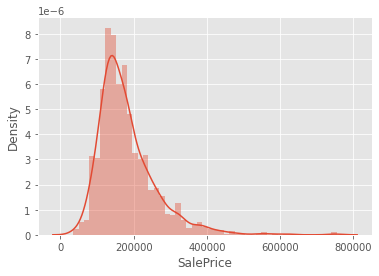

In [8]:
sns.distplot(df_train['SalePrice'])

## 1.2 결측치 확인

In [9]:
pd.set_option('display.max_columns', None)
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

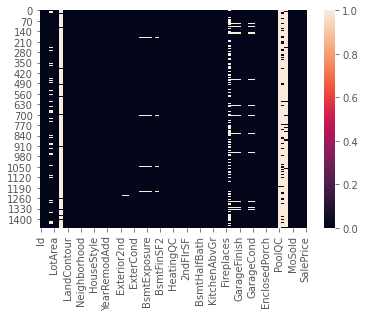

In [13]:
sns.heatmap(df_train.isnull())

<AxesSubplot:>

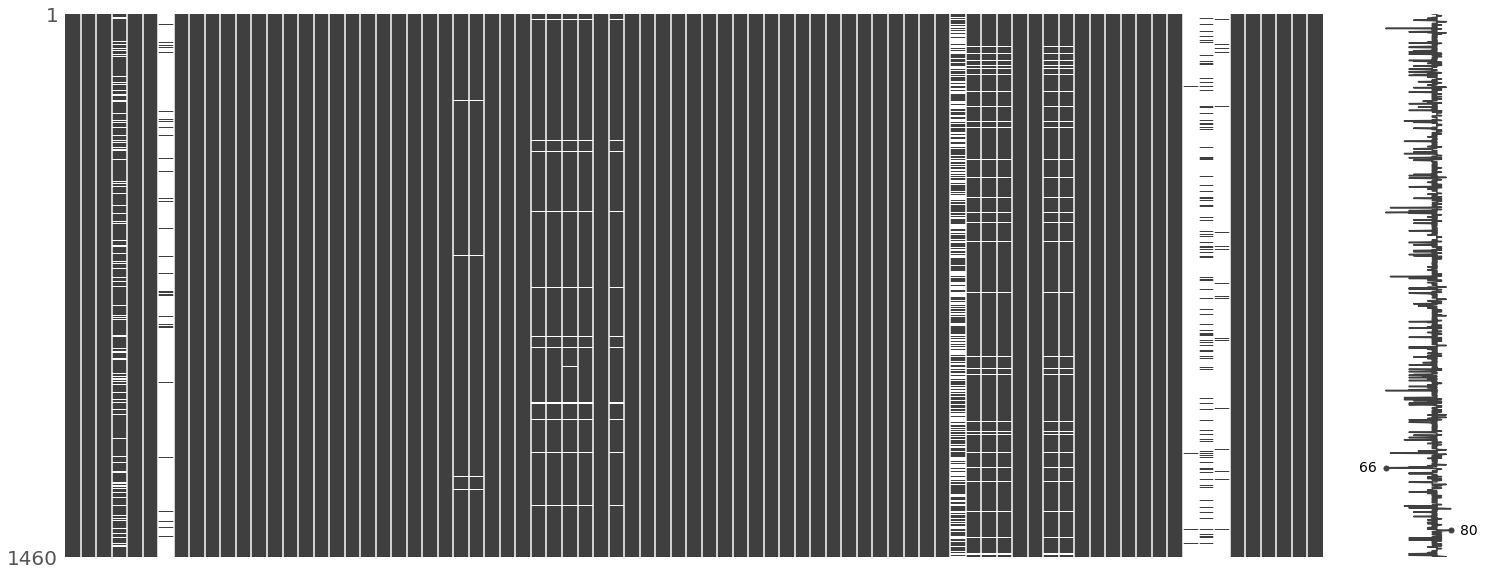

In [11]:
msno.matrix(df_train)

In [14]:
# 각 열의 NaN 비율 알아보기

for col in df_train.columns:
    if df_train[col].isnull().sum() > 0 :
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))

        print(msg)

column: LotFrontage	 Percent of NaN value: 17.74%
column:      Alley	 Percent of NaN value: 93.77%
column: MasVnrType	 Percent of NaN value: 0.55%
column: MasVnrArea	 Percent of NaN value: 0.55%
column:   BsmtQual	 Percent of NaN value: 2.53%
column:   BsmtCond	 Percent of NaN value: 2.53%
column: BsmtExposure	 Percent of NaN value: 2.60%
column: BsmtFinType1	 Percent of NaN value: 2.53%
column: BsmtFinType2	 Percent of NaN value: 2.60%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 47.26%
column: GarageType	 Percent of NaN value: 5.55%
column: GarageYrBlt	 Percent of NaN value: 5.55%
column: GarageFinish	 Percent of NaN value: 5.55%
column: GarageQual	 Percent of NaN value: 5.55%
column: GarageCond	 Percent of NaN value: 5.55%
column:     PoolQC	 Percent of NaN value: 99.52%
column:      Fence	 Percent of NaN value: 80.75%
column: MiscFeature	 Percent of NaN value: 96.30%


- LotFrontage (17.74%) : 직선 피트
- Alley (93.77%) : 골목 종류
- FireplaceQu (47.26%) : 벽난로의 질
- PoolQC (99.52%) : 풀의 질
- Fence (80.75%) : 울타리의 질
- MiscFeatrue (96.30%) : 이것저것 다양한 특징

In [16]:
for col in df_test.columns:
    if df_test[col].isnull().sum() > 0 :
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))

        print(msg)

column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:      Alley	 Percent of NaN value: 92.67%
column:  Utilities	 Percent of NaN value: 0.14%
column: Exterior1st	 Percent of NaN value: 0.07%
column: Exterior2nd	 Percent of NaN value: 0.07%
column: MasVnrType	 Percent of NaN value: 1.10%
column: MasVnrArea	 Percent of NaN value: 1.03%
column:   BsmtQual	 Percent of NaN value: 3.02%
column:   BsmtCond	 Percent of NaN value: 3.08%
column: BsmtExposure	 Percent of NaN value: 3.02%
column: BsmtFinType1	 Percent of NaN value: 2.88%
column: BsmtFinSF1	 Percent of NaN value: 0.07%
column: BsmtFinType2	 Percent of NaN value: 2.88%
column: BsmtFinSF2	 Percent of NaN value: 0.07%
column:  BsmtUnfSF	 Percent of NaN value: 0.07%
column: TotalBsmtSF	 Percent of NaN value: 0.07%
column: BsmtFullBath	 Percent of NaN value: 0.14%
column: BsmtHalfBath	 Percent of NaN value: 0.14%
column: KitchenQual	 Percent of NaN value: 0.07%
column: Functional	 Per

- LotFrontage (15.56%) : 직선 피트
- Alley (92.26%) : 골목 종류
- FireplaceQu (50.03%) : 벽난로의 질
- PoolQC (99.79%) : 풀의 질
- Fence (80.12%) : 울타리의 질
- MiscFeatrue (96.50%) : 이것저것 다양한 특징

<AxesSubplot:>

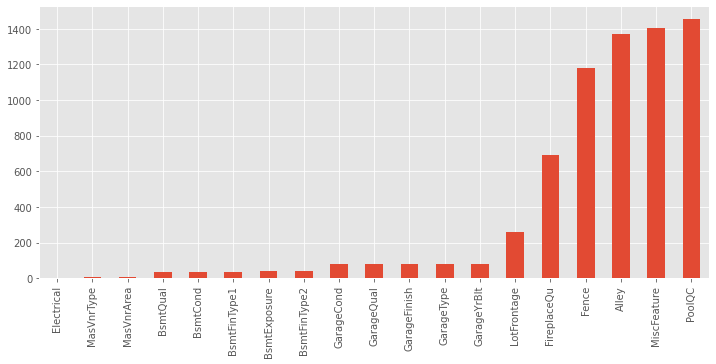

In [17]:
# null data 시각화
null_d = df_train.isnull().sum()
null_d = null_d[null_d>0]

null_d.sort_values(inplace=True)
null_d.plot.bar(figsize=(12, 5))

#### * 우리가 고려해야 할 NaN 값들


1. PoolQC (풀의 종류) - 풀이 없음
2. MiscFeature (기타 기능) - 기타 기능 없음
3. Alley (골목의 종류) - 골목 없음
4. Fence (울타리의 질) - 울타리 없음
5. FireplaceQu (벽난로의 질) - 벽난로 없음


- 위 feature들의 nan값들은 값이 저장되지 않은 것이 아니라 '없음'을 의미
    - 나중에 평균, 중앙값으로 대체하자


- 그 외 feature들의 nan 값은 제거하거나 0으로 대체

In [18]:
# object형 데이터와 numeric형 데이터 개수 확인

obj_features = df_train.dtypes[df_train.dtypes == 'object'].index
num_features = df_train.dtypes[df_train.dtypes != 'object'].index

obj_count = len(obj_features)
num_count = len(num_features)

print("object features: ", obj_count)
print("numeric features: ", num_count)

object features:  43
numeric features:  38


In [19]:
# object형 데이터
obj_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
# numeric형 데이터
num_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## 1.3 이상치 확인 및 제거

### 1.3.1 Turkey Fences
- 사분위 범위(IQR, interquartiel range)를 기반으로
- IQR : 제 3사분위 - 제 1사분위
    - IQR = Q3 - Q1


https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FF4ZPF%2FbtqFcOtgHot%2F3xSvXbHMYyFUwWGomqBo11%2Fimg.png
(출처: https://steadiness-193.tistory.com/78)


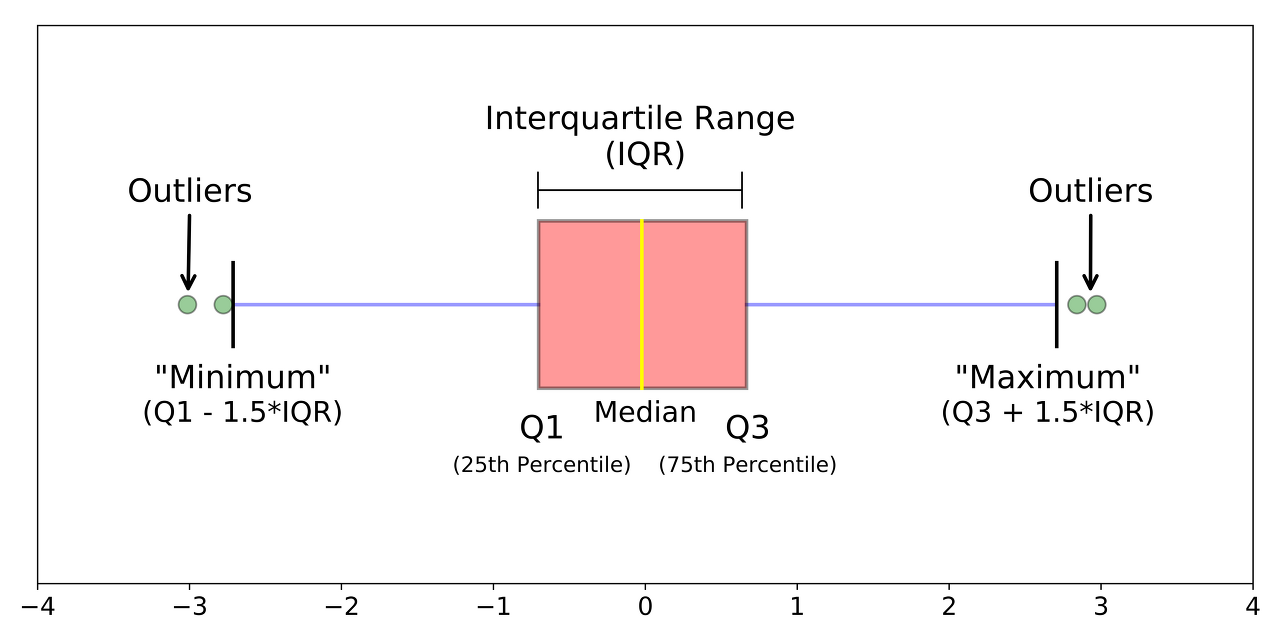!
(출처: https://hong-yp-ml-records.tistory.com/15)


- Turkey Fences에서는 아래 두 가지로 아웃라이어를 판단한다.
    - Q1 - (1.5*IQR) 미만
    - Q3 + (1.5*IQR) 초과

In [ ]:
def find_outlier_Turkey(data):
    q1, q3 = np.percentile(data, [25, 75]) # 4분위 중 1번째, 3번째 찾아냄
    iqr = q3-q1
    
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    mask = np.where((data<lower_bound) | (data>upper_bound)) # 해당 값을 만족하는 데이터의 위치(인덱스) 반환
    
    return mask

### 1.3.2 Z-score (표준점수)

- 표준점수 = (데이터의 포인트 - 데이터의 평균) / 데이터의 표준편차
- 표준점수를 구하면 평균값(0), 표준편차(1)
- 음의 Z-score : 데이터 포인트 < 평균
- 양의 Z-score : 데이터 포인트 > 평균
- 0 : 데이터 포인트가 중간(평균)
- 1 : 데이터 포인트가 평균보다 1 표준편차가 높다.


- Z-score가 3보다 크거나 -3보다 작을 때 이상치라고 판단한자

In [ ]:
def find_outlier_z(data):
    threshold = 3
    
    mean = np.mean(data)
    std = np.std(data)
    
    z_sore = [(y-mean) / std for y in data]
    
    masks = np.where(np.abs(z_score) > threshold)
    return mask

In [23]:
# 이상치 탐색 및 제거 (튜키의 방법 이용)

from collections import Counter

def get_outlier(df, features):
    outlier_idx = []
    
    for col in features:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3-q1 # (상위 75% 지점의 값) - (하위 25% 지점의 값)
                    
        lower_bound = q1 - (iqr*1.5) # 최소 제한선
        upper_bound = q3 + (iqr*1.5) # 최대 제한선
        
        # 최소 제한선, 최대 제한선 넘어가는 값들을 가지는 컬럼을 이상치를 가지는 컬럼이라 생각
        outlier_col = df[(df[col]<lower_bound) | (df[col]>upper_bound)].index
        outlier_idx.extend(outlier_col) # 빈 인덱스에 이상치 가지는 컬럼 추가
        
    outlier_idx = Counter(outlier_idx) # 이상치 컬럼 개수 카운팅
    multiple_outliers = list(k for k, v in outlier_idx.items() if v>2) # 이상치가 2개 초과라면 outlier 리스트 생성
    
    return multiple_outliers


In [25]:
# 수치형 데이터
# num_features에서 'SalePrice' 빼는 방법 ?

features = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

outlier_drop = get_outlier(df_train, features)

In [27]:
# outlier가 발생한 행 데이터 추출
df_train.loc[outlier_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,5,7,1940,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,351,Rec,181,112,644,GasA,Gd,Y,SBrkr,808,547,0,1355,1,0,2,0,4,2,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495,Rec,215,354,1064,GasA,Gd,Y,SBrkr,1064,703,0,1767,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,RFn,2,504,Gd,TA,Y,441,35,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NaN,Detchd,1980.0,Unf,2,576,TA,TA,Y,264,56,0,0,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,Duplex,2Story,5,5,1960,1960,Gable,CompShg,MetalSd,MetalSd,BrkFace,361.0,TA,TA,CBlock,TA,TA,No,Rec,443,Unf,0,662,1105,GasA,TA,Y,FuseA,1105,1169,0,2274,0,0,2,0,5,2,TA,12,Typ,0,NaN,Detchd,1960.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,TA,TA,No

In [28]:
# 이상치 포함된 행 제거
df_train = df_train.drop(outlier_drop, axis=0).reset_index(drop=True)
df_train.shape

# reset_index : 인덱스 값을 컬럼으로 만들어줌
# drop=True : 원본의 인덱스 대체 (drop하고 새로)

# 행이 1460 -> 1338 로 감소함

(1338, 81)

In [29]:
df_test = df_test.drop(outlier_drop, axis=0).reset_index(drop=True)
df_test.shape

(1337, 80)

## 1.3 결측치에 값 처리하기

- 범주형 데이터에서 NaN의 의미 = 없다는 뜻 ! (해당 특징이 존재하지 않음)
    - 0으로 대체해주자

In [30]:
# 범주형 데이터 - 결측치 'None'으로 대체하기
for col in obj_features:
    df_train[col] = df_train[col].fillna('None')

for col in obj_features:
    df_test[col] = df_test[col].fillna('None')

In [31]:
# 수치형 데이터 - nan 값은 mean으로 대체

for col in features:
    if df_train[col].isnull().sum() > 0 :
        df_train[col] = df_train[col].fillna(df_train[col].mean())

for col in features:
    if df_test[col].isnull().sum() > 0 :
        df_test[col] = df_test[col].fillna(df_test[col].mean())

In [ ]:
# 문자형(object) 데이터 -> numeric 데이터로 변환


# 2. EDA
## 2.1 상관관계 분석 (수치형 데이터)
- heatmap / scattermap / regplot
- 수치형 변수 -> 상관관계
- 범주형 변수 -> boxplot?
- saleprice와 관계가 큰/적은 feature 나누기

In [32]:
num_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

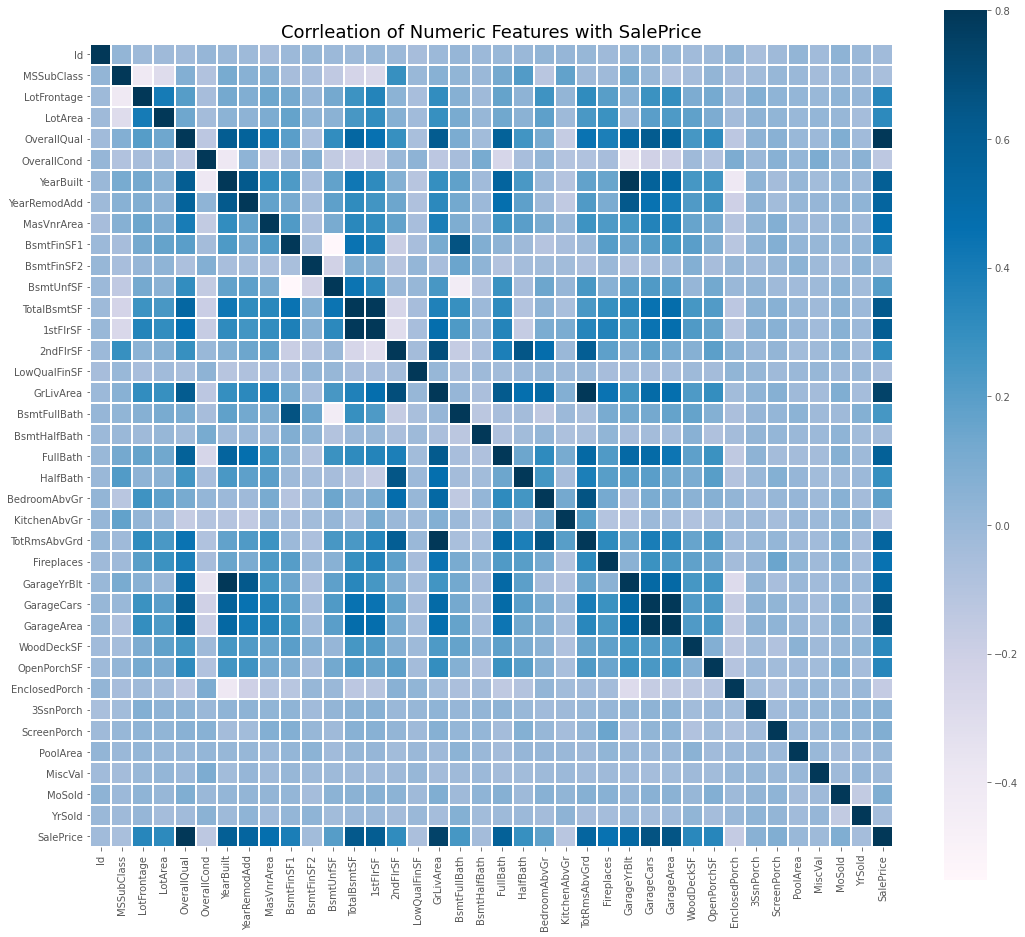

In [33]:
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

colormap = plt.cm.PuBu

fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(corr_data.corr(),
            vmax=.8, # 컬러바 최대 크기
            linewidths=0.1, # 경계면 실선으로 구분하기
            square=True,
            annot=False, # 실제값 표시 x
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

#### * SalePrice(타겟)와 상관관계가 깊은 feature들 확인
- OverallQual
- GrLivArea
- GarageCars
- YearBuilt / YearRemodAdd / FullBath / TotalBsmtSF / 1stFlrSF / GarageArea


#### * 서로 상관관계가 높은 feature들 확인
- GarageYrBlt & YearBuilt
- TotRmsAbvGrd & GrLivArea
- 1stFlrSF & TotalBsmtSF


<AxesSubplot:xlabel='GarageCars', ylabel='GarageCars'>

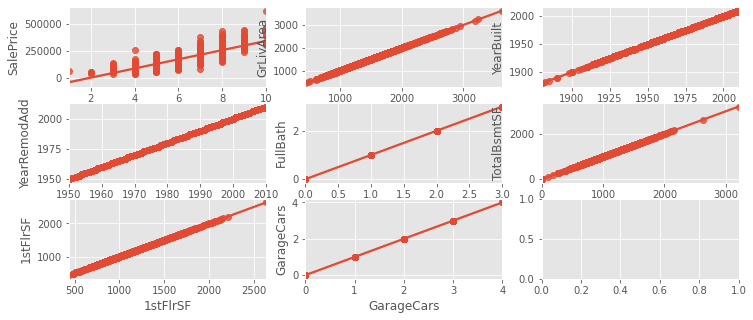

In [34]:
fig, ax = plt.subplots(3, 3, figsize=(12, 5))

sns.regplot(x="OverallQual", y="SalePrice", data=df_train, ax=ax[0, 0])
sns.regplot(x="GrLivArea", y="GrLivArea", data=df_train, ax=ax[0, 1])
sns.regplot(x="YearBuilt", y="YearBuilt", data=df_train, ax=ax[0, 2])
sns.regplot(x="YearRemodAdd", y="YearRemodAdd", data=df_train, ax=ax[1, 0])
sns.regplot(x="FullBath", y="FullBath", data=df_train, ax=ax[1, 1])
sns.regplot(x="TotalBsmtSF", y="TotalBsmtSF", data=df_train, ax=ax[1, 2])
sns.regplot(x="1stFlrSF", y="1stFlrSF", data=df_train, ax=ax[2, 0])
sns.regplot(x="GarageCars", y="GarageCars", data=df_train, ax=ax[2, 1])

## 2.2 상관관계 분석 (범주형 데이터)


In [35]:
obj_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
len(obj_features)

43

In [37]:
for obj in obj_features[:4]:
    print(df_train[obj].value_counts())

RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
Pave    1335
Grvl       3
Name: Street, dtype: int64
None    1259
Grvl      42
Pave      37
Name: Alley, dtype: int64
Reg    859
IR1    440
IR2     32
IR3      7
Name: LotShape, dtype: int64


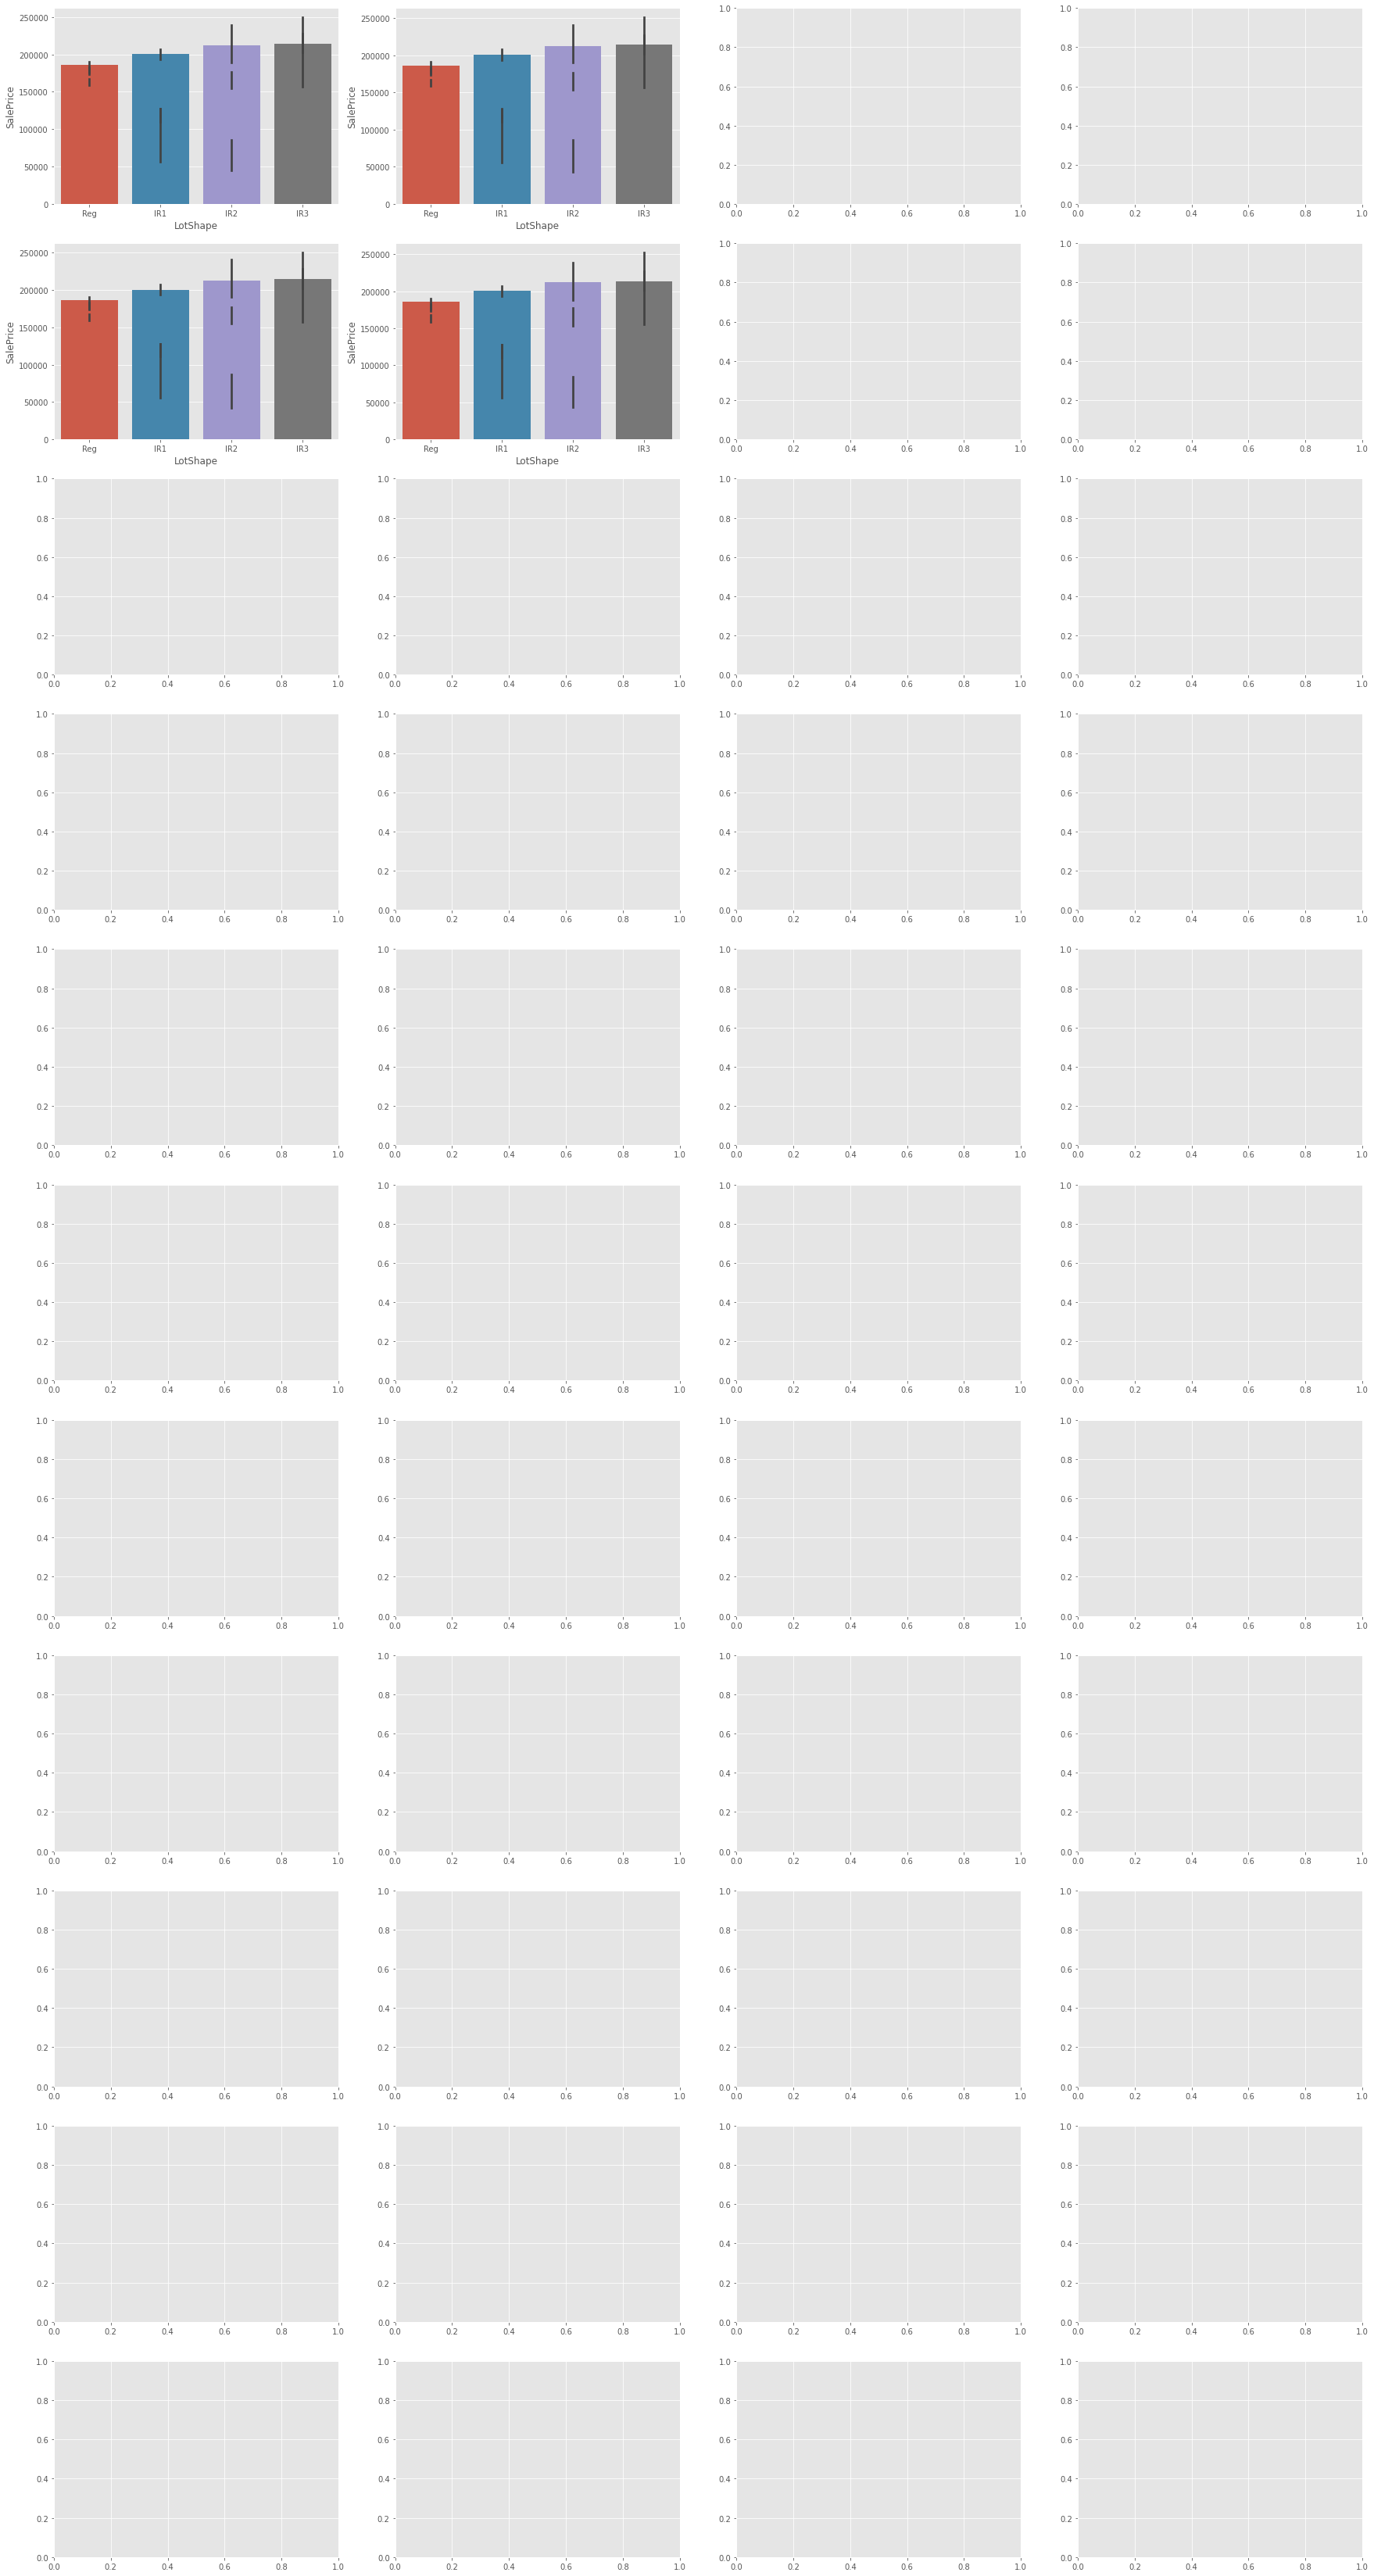

In [38]:
f, ax = plt.subplots(11, 4, figsize=(30, 60))

for obj in obj_features[:4]:
    for row in range(0, 2):
        for col in range(0, 2):
            sns.barplot(data=df_train, x=obj, y="SalePrice", ax=ax[row, col])

# 3. Feature Engineering
- 첨도와 왜도 -> log 취해주기
- null data를 채워주기
    - 0과 1은 단순히 있다, 없다 -> 변경?
    - 또는 정말 nan 데이터 -> drop
- categorical 데이터 -> numerical 데이터

Skewness: 1.287364
Kurtosis: 2.555029


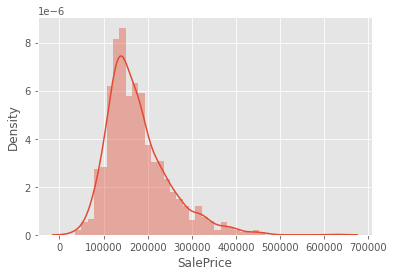

In [39]:
sns.distplot(df_train['SalePrice'])

print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skewness: 1.287364
Kurtosis: 2.555029


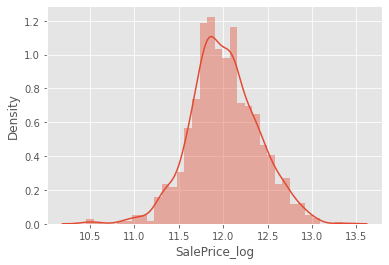

In [40]:
# 로그 취해주기

df_train["SalePrice_log"] = df_train["SalePrice"].map(lambda i: np.log(i) if i>0 else 0)
sns.distplot(df_train['SalePrice_log'])

print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

In [41]:
# 기존의 SamplePrice 열은 지우기
df_train = df_train.drop(["SalePrice"], axis="columns")

In [ ]:
# 위의 범주형 데이터, 수치형 데이터 중 유의미한 / 무의미한 데이터를 구분해 무의미한 데이터 삭제하고싶다.
# 범주형 데이터 -> 수치형 데이터로 변환?